In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import glob
from collections import Counter,defaultdict
import matplotlib.image as mpimg
from IPython.display import clear_output
import time
import warnings
warnings.filterwarnings('ignore')
from  sklearn.model_selection import train_test_split
import sys,os
from shutil import copyfile
import numpy as np


In [2]:
attribute_img_path = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/Category and Attribute/Anno/list_attr_img.txt'
attribute_cloth_path = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/Category and Attribute/Anno/list_attr_cloth.txt'
img_path = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/Category and Attribute/img/'

In [3]:
# attribute_img = pd.read_csv(attribute_img_path,delim_whitespace=True)
attribute_cloth = pd.read_csv(attribute_cloth_path, sep="\s\s+") # columns = ['attribute_name', 'attribute_type'])

# reading attribute_img_path chunksize wise

In [4]:
chunksize = 10 ** 4
attribute_type = 5

# print chunksize
# attribute_img = 0
dd = []
for chunk in pd.read_csv(attribute_img_path, sep="\s\s\s+", chunksize=chunksize):
    attribute_img = chunk
    
    for i in attribute_img['attribute_labels']:
        if type(i) == str:

            ll = i.split()
            ll = np.array(ll)
            pos = np.where(ll == '1')[0]
            for j in pos:
                if attribute_cloth.iloc[j]['attribute_type'] == attribute_type: 
                    dd.append(j+1)
dist = Counter(dd)
# print dist
print dist

Counter({893: 7614, 163: 7181, 761: 6714, 706: 6569, 578: 5934, 782: 3900, 824: 3379, 693: 2882, 238: 2550, 564: 2506, 439: 2337, 84: 2126, 142: 2096, 100: 2000, 852: 1995, 438: 1968, 45: 1880, 989: 1877, 250: 1864, 654: 1813, 900: 1769, 765: 1725, 49: 1724, 853: 1718, 938: 1671, 987: 1622, 513: 1488, 46: 1476, 307: 1428, 31: 1330, 983: 1275, 901: 1240, 563: 1214, 539: 1108, 959: 1101, 481: 1098, 932: 1082, 954: 1067, 692: 1022, 28: 1017, 160: 938, 872: 934, 794: 891, 702: 886, 263: 867, 568: 847, 325: 841, 902: 787, 303: 766, 447: 661, 975: 660, 778: 652, 757: 629, 764: 626, 73: 621, 873: 615, 120: 614, 133: 603, 655: 589, 105: 579, 978: 565, 988: 558, 688: 548, 18: 533, 931: 532, 294: 525, 412: 518, 85: 514, 659: 509, 304: 500, 24: 491, 894: 486, 610: 474, 484: 468, 928: 450, 713: 442, 588: 431, 632: 402, 420: 401, 479: 394, 784: 388, 61: 387, 453: 378, 658: 371, 276: 371, 891: 368, 583: 362, 106: 358, 127: 356, 335: 355, 577: 347, 406: 341, 835: 328, 611: 325, 861: 315, 974: 311, 63

In [5]:
chunksize = 10 ** 4

image_name = []
for chunk in pd.read_csv(attribute_img_path, sep="\s\s\s+", chunksize=chunksize):
    attribute_img = chunk
    
    for i in attribute_img['image_name']:
        image_name.append(i)
        
print len(image_name)

289222


In [6]:
print image_name[0]
print image_name[1]

img/Sheer_Pleated-Front_Blouse/img_00000001.jpg
img/Sheer_Pleated-Front_Blouse/img_00000002.jpg


In [7]:
## root class distribution
import numpy as np

## convert 50 class to their names
order_map = {}
for i in attribute_cloth.index:
    if attribute_cloth.iloc[i]['attribute_type'] == attribute_type: 
        order_map[i+1] = attribute_cloth.iloc[i]['attribute_name']

    
# print order_map
print 
#   distribution
attribute_cloth_map = defaultdict()
    
for i in attribute_cloth.index:
    if attribute_cloth.iloc[i]['attribute_type'] == attribute_type: 
        attribute_cloth_map[i+1] = attribute_cloth.loc[i]['attribute_type']
    
print 'done'
print attribute_cloth_map
# right above it
    
class50_map = {}



done
defaultdict(None, {513: 5, 989: 5, 17: 5, 18: 5, 24: 5, 539: 5, 28: 5, 29: 5, 30: 5, 31: 5, 42: 5, 45: 5, 46: 5, 47: 5, 49: 5, 563: 5, 564: 5, 565: 5, 56: 5, 57: 5, 61: 5, 693: 5, 577: 5, 578: 5, 579: 5, 582: 5, 583: 5, 72: 5, 73: 5, 76: 5, 589: 5, 80: 5, 593: 5, 84: 5, 85: 5, 601: 5, 610: 5, 611: 5, 100: 5, 105: 5, 106: 5, 622: 5, 623: 5, 624: 5, 872: 5, 628: 5, 120: 5, 121: 5, 634: 5, 635: 5, 636: 5, 618: 5, 127: 5, 642: 5, 131: 5, 133: 5, 142: 5, 655: 5, 657: 5, 658: 5, 659: 5, 959: 5, 794: 5, 159: 5, 160: 5, 161: 5, 163: 5, 678: 5, 540: 5, 967: 5, 688: 5, 179: 5, 692: 5, 181: 5, 969: 5, 702: 5, 705: 5, 706: 5, 712: 5, 713: 5, 716: 5, 808: 5, 632: 5, 757: 5, 633: 5, 729: 5, 730: 5, 977: 5, 238: 5, 751: 5, 753: 5, 754: 5, 979: 5, 245: 5, 760: 5, 249: 5, 250: 5, 251: 5, 764: 5, 765: 5, 254: 5, 767: 5, 262: 5, 263: 5, 264: 5, 778: 5, 727: 5, 780: 5, 781: 5, 782: 5, 784: 5, 276: 5, 691: 5, 790: 5, 793: 5, 282: 5, 795: 5, 796: 5, 987: 5, 805: 5, 294: 5, 295: 5, 296: 5, 302: 5, 303:

## DATASET PREPARATION : FILTERING MINORITY CLASSES

In [8]:
## ===========      CREATE A DATAFRAME OF IMAGE PATH AND ITS LABELS   =====================
image_path = []
image_label = []
# print attribute_img.iloc[0]['attribute_labels']
loc = 0
for chunk in pd.read_csv(attribute_img_path, sep="\s\s\s+", chunksize=chunksize):
    attribute_img = chunk
    
    
    for i in attribute_img['attribute_labels']:
        if type(i) == str:

            ll = i.split()
            ll = np.array(ll)
            pos = np.where(ll == '1')[0]
            for j in pos:
                if attribute_cloth.iloc[j]['attribute_type'] == attribute_type:
                    if dist[j+1]>=5934:   # change here for number of classes
                        #print 'hi'
                        #print image_name[pos]
                        image_path.append(image_name[loc])#attribute_img.iloc[i]['image_name'])
                        image_label.append(order_map[j+1])
                        #class50_map[ attribute_img.iloc[i]['image_name']] = order_map[j]
                #dd.append(j+1)
        loc += 1
            

print 'done'
print loc

done
289222


In [9]:
df = pd.DataFrame({'path':image_path,'label':image_label})
df.to_csv('dataset.csv')

print "DATASET CLASS DISTRIBUTION\n"
print "n_classes : "+str(len(Counter(df['label'])))
print Counter(df['label'])

DATASET CLASS DISTRIBUTION

n_classes : 5
Counter({'summer': 7614, 'classic': 7181, 'red': 6714, 'pink': 6569, 'love': 5934})


In [10]:
df.head(3)

,label,path
0,love,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg
1,classic,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg
2,love,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg


# TOP 5 ATTRIBUTE VISUALISATION

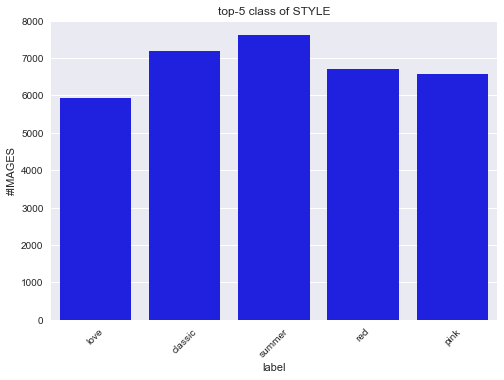

In [11]:
import seaborn as sb

# gen_order = df['label'].value_count().index
sb.countplot(data=df, x='label', color='blue')
# plt.bar(df, label=df['label'], color='blue')
# plt.legend()
plt.ylabel('#IMAGES')
plt.xticks(rotation=45)
plt.title('top-5 class of STYLE')
plt.savefig('style.png')
plt.show()

# CLASS BALANCE

In [11]:
## balance classes
UPPER_LIMIT = 6000#8000

count_dict = defaultdict(lambda : 0)

labels =[]
paths =[]

for i,l in enumerate(image_label):
    if l=='summer' or l =='classic' or l =='red' or l=='pink' or l=='love':
        if count_dict[l] < UPPER_LIMIT:
            labels.append(image_label[i])
            paths.append(image_path[i])
    count_dict[l]+=1
    
df = pd.DataFrame({'path':paths,'label':labels})
Counter(df['label'])

Counter({'classic': 6000,
         'love': 5934,
         'pink': 6000,
         'red': 6000,
         'summer': 6000})

In [12]:
## PREPARE   TRAIN , TEST , VALIDATION :STRATIFIED
TEST_SIZE = 0.999

X_train, X_test, y_train, y_test = train_test_split(df['path'], df['label'],stratify=df['label'], test_size=TEST_SIZE)

train = pd.DataFrame({'path':X_train,'label':y_train})
test_data = pd.DataFrame({'path':X_test,'label':y_test})

# clear variables

del X_train, X_test, y_train, y_test
print "TRAIN data size "
print train.shape

print "TEST and VALIDATION data size  "
print test_data.shape

X_val, X_test, y_val, y_test = train_test_split(test_data['path'], test_data['label'],stratify=test_data['label'], test_size=0.25)

val = pd.DataFrame({'path':X_val,'label':y_val})
test = pd.DataFrame({'path':X_test,'label':y_test})

# clear variables

del X_val, X_test, y_val, y_test,df

Counter(test['label'])


#  ====== DROP INDEXES ============


val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

TRAIN data size 
(29, 2)
TEST and VALIDATION data size  
(29905, 2)


In [13]:
print sum(Counter(test['label']).values())
print sum(Counter(val['label']).values())

7477
22428


In [14]:
val.head()

,label,path
0,pink,img/Floral_Button-Front_Dress/img_00000044.jpg
1,classic,img/Classic_Two-Button_Blazer/img_00000037.jpg
2,love,img/Boxy_Marled_Knit_Top/img_00000006.jpg
3,pink,img/Slouchy_Marled_Sweater/img_00000049.jpg
4,red,img/Fluttered_Polka_Dot_Blouse/img_00000050.jpg


In [15]:
test.head()

,label,path
0,summer,img/Quilted_Sweatpants/img_00000056.jpg
1,love,img/Varsity-Striped_Scuba_Knit_Skirt/img_00000...
2,summer,img/Crochet-Trimmed_Floral_Romper/img_00000031...
3,love,img/Knit_Romper/img_00000007.jpg
4,classic,img/Classic_Boyfriend_Blazer/img_00000132.jpg


In [16]:
## create directories and save data
# dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/small_data_attri5/test/'
dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/30_11_new/small_data_attri5/test/'

def create_folders(data):
    
    print "Total Images : "+str(data.shape[0])
    global dest_dir
    for i in data.index:
        label = data.iloc[i]['label']
        #print label
        src = img_path+data.iloc[i]['path']
        #print src
        #print dest_dir+'/'+label
        #break
        
#         if not os.path.exists(dest_dir+label):
#             os.makedirs(dest_dir+label)
            
        copyfile(src, dest_dir+label+'/'+data.iloc[i]['path'].split('/')[-2]+'_'+data.iloc[i]['path'].split('/')[-1])
        if i%1000==0:
            print i
    
create_folders(test)    

Total Images : 7477
0
1000
2000
3000
4000
5000
6000
7000


In [17]:
## create directories and save data
# dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/small_data_attri5/val/'
dest_dir = '/media/mint/New Volume/3_semester_IIIT_D/CF/project/30_11_new/small_data_attri5/val/'

def create_folders(data):
    
    print "Total Images : "+str(data.shape[0])
    global dest_dir
    for i in data.index:
        label = data.iloc[i]['label']
        src = img_path+data.iloc[i]['path']
        
#         if not os.path.exists(dest_dir+label):
#             os.makedirs(dest_dir+label)
            
        copyfile(src, dest_dir+label+'/'+data.iloc[i]['path'].split('/')[-2]+'_'+data.iloc[i]['path'].split('/')[-1])
        if i%1000==0:
            print i
    
create_folders(val)    

Total Images : 22428
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000


In [18]:
N_CLASSES = 10